<a href="https://colab.research.google.com/github/brunoviti/2044-numpy-analisis-numerico-eficiente-con-python/blob/main/curso_de_estad_stica_con_python_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=#56B4E9 size=10>CURSO DE ESTADÍSTICA</font>
***

<font color=#56B4E9 size = 5>*Preparando el ambiente*</font>

# <font color=#56B4E9>1 CONOCIENDO LOS DATOS</font>
***

## <font color=#56B4E9>1.1 Dataset del proyecto</font>
***

### Muestra de domicilios Colombia - 2018

Las investigaciones por muestras de domicilios realizadas anualmente, buscan encontrar característcias generales de la población, de educación, trabajo, rendimiento y otras, de acuerdo con las necesidades de información del país, tales como las características de migración, fertilidad, casamientos, salud, nutrición, entre otros temas. Estas muestras al pasar de los años consistuyen una herramienta importante para la formulación, validación y evaluación de políticas dirigidas al desarrollo socioeconómico y la mejora de las condiciones de vida en Colombia.


### Datos

Los datos fueron creados  de manera didáctica para este curso.

### Variables utilizadas

> ### Ingreso
> ***

Ingresos mensuales (en miles de pesos) del trabajo principal para personas de 10 años o más.

> ### Edad
> ***

Edad del entrevistado en la fecha de referencia en años.

> ### Altura
> ***

Altura del entrevistado em metros.

> ### Ciudad
> ***

Código de referência a 27 ciudades analizadas.


> ### Sexo
> ***

|Código|Descripción|
|---|---|
|0|Masculino|
|1|Femenino|

> ### Años de Estudio
> ***

|Código|Descripción|
|---|---|
|1|Sin estudios y menos de 1 año|
|2|1 año|
|3|2 años|
|4|3 años|
|5|4 años|
|6|5 años|
|7|6 años|
|8|7 años|
|9|8 años|
|10|9 años|
|11|10 años|
|12|11 años|
|13|12 años|
|14|13 años|
|15|14 años|
|16|15 años o más|
|17|No se sabe|
||No aplica|

> ### Color
> ***

|Código|Descripción|
|---|---|
|0|Indio|
|2|Blanco|
|4|Negro|
|6|Amarillo|
|8|Moreno|
|9|Sin declarar|

> ### Tratamiento a los datos
***

> Algunos de los tratamientos de datos más frecuentes son:
> 1. Eliminar las observaciones (líneas) con entradas de datos inválidos;
> 2. Eliminar observaciones donde hay datos perdidos (missing data);
> 3. Filtros própios de la investigación, por ejemplo: considerar solo las encuestas realizadas a la cabeza de familia (responsable por el domicilio).

### Importando pandas y leyendo el dataset del projecto

https://pandas.pydata.org/

In [5]:
import pandas as pd

In [6]:
datos = pd.read_csv("/content/datos.csv")

In [7]:
datos.sample(10)

,Ciudad,Sexo,Edad,Color,Años de Estudio,Ingreso,Altura
66860,43,1,39,2,9,800,1.775263
10888,17,0,30,8,9,900,1.752489
30218,29,1,42,8,16,600,1.714433
6681,15,1,48,8,4,788,1.559835
57299,41,1,32,2,7,950,1.809176
28187,29,0,49,2,12,2000,1.553528
75271,53,0,31,2,15,2500,1.681329
10318,17,0,59,8,3,0,1.556280
57183,41,0,68,8,8,3000,1.780837
40179,32,0,62,2,8,1000,1.563392


## <font color=#56B4E9>1.2 Tipos de datos</font>
***

### Clasificación de una variable
<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img001.png' width='70%'>

### Variables cualitativas ordinales

► Variables que pueden ser ordenadas o que responen algun tipo de jerarquía

In [8]:
sorted(datos['Años de Estudio'].unique())

[np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17)]

### Variables cualitativas nominales

► Variables que no pueden ser ordenadas ni responden alguna jerarquía.

In [9]:
sorted(datos['Sexo'].unique())

[np.int64(0), np.int64(1)]

In [10]:
sorted(datos['Color'].unique())

[np.int64(0), np.int64(2), np.int64(4), np.int64(6), np.int64(8)]

In [11]:
sorted(datos['Ciudad'].unique())

[np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17),
 np.int64(21),
 np.int64(22),
 np.int64(23),
 np.int64(24),
 np.int64(25),
 np.int64(26),
 np.int64(27),
 np.int64(28),
 np.int64(29),
 np.int64(31),
 np.int64(32),
 np.int64(33),
 np.int64(35),
 np.int64(41),
 np.int64(42),
 np.int64(43),
 np.int64(50),
 np.int64(51),
 np.int64(52),
 np.int64(53)]

### Variables cuantitativas discretas

► Variables que representan un conteo donde los valores posibles forman un conjunto finito o numerable.


In [12]:
datos.Edad.max()

99

In [13]:
print(f"La edad mínima es {datos.Edad.min()} y la edad máxima es {datos.Edad.max()}")

La edad mínima es 13 y la edad máxima es 99


#### <font color='red'>Observación</font>
***
> La variable edad puede ser clasificada de tres formas diferentes:
> 1. <b>CUANTITATIVA DISCRETA</b> - cuando representa años completos (números enteros);
> 2. <b>CUANTITATIVA CONTINUA</b> - cuando representa la edad exacta, siendo representada por fracciones de años;
> 3. <b>CUALITATIVA ORDINAL</b> - cuando representa  intervalos de edad.

### Variables cuantitativas continuas

► Variables que representan un conteo o medición que asume valores en escalas continuas (números reales).

In [14]:
print(f"La Altura mínima es {datos['Altura'].min()} y la altura máxima es {datos['Altura'].max()}")

La Altura mínima es 1.339244614 y la altura máxima es 2.028496765


# <font color=#56B4E9>2 DISTRIBUCIÓN DE FRECUENCIAS</font>
***

El primer paso en un análisis es conocer el comportamiento de las variables involucradas en el estudio. Utilizando técnicas estadísticas como el análisis de las <b> DISTRIBUCIONES DE FRECUENCIAS </b> e <b> HISTOGRAMAS </b> podemos evaluar mejor cómo se distribuyen los fenómenos del estudio.



## <font color=#56B4E9>2.1 Distribución de frecuencias para variables cualitativas</font>
***

### Método 1

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.value_counts.html

In [15]:
datos.Sexo.value_counts()

,count
Sexo,
0,53250
1,23590


In [16]:
datos.Sexo.value_counts(normalize = True).round(4) * 100

,proportion
Sexo,
0,69.3
1,30.7


In [17]:
frecuencia_sexo = datos.Sexo.value_counts()
frecuencia_sexo

,count
Sexo,
0,53250
1,23590


In [18]:
porcentaje_sexo = datos.Sexo.value_counts(normalize = True).round(4) * 100
porcentaje_sexo

,proportion
Sexo,
0,69.3
1,30.7


In [19]:
dist_frec_cuialitativa = pd.DataFrame({'Sexo': frecuencia_sexo.index,
              'Frecuencia': frecuencia_sexo.values,
              'Porcentaje': porcentaje_sexo.values})



In [20]:
dist_frec_cuialitativa

,Sexo,Frecuencia,Porcentaje
0,0,53250,69.3
1,1,23590,30.7


In [21]:
dist_frec_cuialitativa.rename( index= {0: 'Masculino',
                                       1: 'Femenino'}, inplace = True)

In [22]:
dist_frec_cuialitativa.rename_axis('Sexo', axis = 'columns', inplace = True)

In [23]:
dist_frec_cuialitativa

Sexo,Sexo,Frecuencia,Porcentaje
Masculino,0,53250,69.3
Femenino,1,23590,30.7


### Método 2

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.crosstab.html

In [24]:
sexo = {0: 'Masculino',
        1: 'Femenino'}

color = {0: 'Indigena',
         2: 'Blanco',
         4: 'Negro',
         6: 'Amarillo',
         8: 'Pardo',
         9: 'Sin declarar'}

In [25]:
frecuencia = pd.crosstab(datos['Sexo'],
            datos['Color'],)

In [26]:
frecuencia

Color,0,2,4,6,8
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


In [27]:
frecuencia.rename(index = sexo, inplace = True)
frecuencia.rename(columns = color, inplace = True)
frecuencia

Color,Indigena,Blanco,Negro,Amarillo,Pardo
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Femenino,101,9621,2889,117,10862


In [28]:
porcentaje = pd.crosstab(datos['Sexo'],
            datos['Color'],
            normalize = True).round(4) * 100

porcentaje.rename(index = sexo, inplace = True)
porcentaje.rename(columns = color, inplace = True)
porcentaje

Color,Indigena,Blanco,Negro,Amarillo,Pardo
Sexo,,,,,
Masculino,0.33,28.88,7.16,0.31,32.62
Femenino,0.13,12.52,3.76,0.15,14.14


## <font color=#56B4E9>2.2 Distribución de frecuencia para variables cuantitativas (clases personalizadas)</font>
***

### Paso 1 - Especifique los límites de cada clase

Utilice la siguiente clasificación:

<b>A</b> ► Más de 20 SM

<b>B</b> ► De 10 a 20 SM

<b>C</b> ► De 4 a 10 SM

<b>D</b> ► De 2 a 4 SM

<b>E</b> ► Hasta 2 SM

donde <b>SM</b> es el valor del salario mínimo en ese momento. En nuestro caso <b>788 mil pesos colombianos</b> (2018):

<b>A</b> ► Más de 15.760

<b>B</b> ► De 7.880 a 15.760

<b>C</b> ► De 3.152 a 7.880

<b>D</b> ► De 1.576 a 3.152

<b>E</b> ► Hasta 1.576


In [29]:
datos.Ingreso.min()

0

In [30]:
datos.Ingreso.max()

200000

In [31]:
labels = ['E', 'D', 'C', 'B', 'A']
labels

['E', 'D', 'C', 'B', 'A']

### Paso 2 - Crear la tabla de frecuencias

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.cut.html

In [39]:
frecuencia = pd.value_counts(
    pd.cut(x = datos['Ingreso'],
                    bins = 20,
                    labels = labels,
                    include_lowest = True)
)
frecuencia

ValueError: Bin labels must be one fewer than the number of bin edges

In [37]:
porcentaje = pd.value_counts(
    pd.cut(x = datos['Ingreso'],
                    bins = clases,
                    labels = labels,
                    include_lowest = True),
                    normalize = True).round(4) * 100
porcentaje

NameError: name 'clases' is not defined

In [36]:
dist_frec_cuantitativas = pd.DataFrame({'Ingreso': frecuencia.index,
                                       'Frecuencia': frecuencia.values,
                                       'Porcentaje': porcentaje.values})
dist_frec_cuantitativas

ValueError: Per-column arrays must each be 1-dimensional

## <font color=#56B4E9>2.3 Distribución de frecuencia para variables cuantitativas (clases de amplitud fija)</font>
***

### Importando bibliotecas

http://www.numpy.org/

In [35]:
import numpy as np

### Paso 1 - Difiniendo el número de clases

#### Regla de Sturges

# $$k = 1 + \frac {10}{3}\log_{10}n$$

In [ ]:
n = datos.shape[0]

In [ ]:
k = 1 + (10 / 3) * np.log10(n)

In [ ]:
k

In [ ]:
frecuencia_sturges = pd.value_counts(
    pd.cut(x = datos['Ingreso'],
                    bins = 17,
                    include_lowest = True)
)
frecuencia_sturges

### Paso 2 - Crear la tabla de frecuencias

In [ ]:
porcentaje_sturges = pd.value_counts(
    pd.cut(x = datos['Ingreso'],
                    bins = 17,
                    include_lowest = True),
                    normalize = True).round(4) * 100
porcentaje_sturges

## <font color=#56B4E9>2.4 Histograma</font>
***

El <b>HISTOGRAMA</b> es la representación gráfica de una distribución de frecuencia. Es un gráfico formado por un conjunto de rectángulos colocados uno al lado del otro, donde el área de cada rectángulo es proporcional a la frecuencia de la clase que representa.

### Importando la biblioteca

https://seaborn.pydata.org/

In [40]:
import seaborn as sns

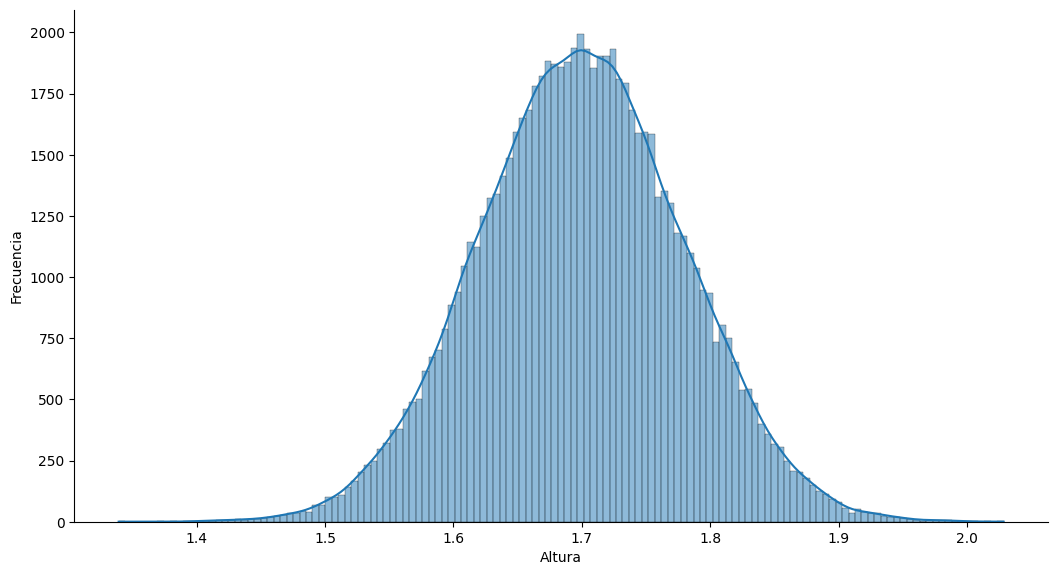

In [41]:
ax = sns.displot(datos['Altura'], kde = True)
ax.fig.set_size_inches(12, 6)
ax.set(xlabel = 'Altura',
       ylabel = 'Frecuencia')
ax.set_titles('Histograma de Altura')

# <font color=#56B4E9>3 MEDIDAS DE TENDENCIA CENTRAL</font>
***

## DataFrame de ejemplo

In [42]:
df = pd.DataFrame(data = {'María': [8, 10, 4, 8, 6, 10, 8],
                          'Pedro': [10, 2, 0.5, 1, 3, 9.5, 10],
                          'Pablo': [7.5, 8, 7, 8, 8, 8.5, 7]},
                  index = ['Matemática',
                           'Portugués',
                           'Inglés',
                           'Geografía',
                           'Historia',
                           'Física',
                           'Química'])
df.rename_axis('Asignaturas', axis = 'columns', inplace = True)
df

Asignaturas,María,Pedro,Pablo
Matemática,8,10.0,7.5
Portugués,10,2.0,8.0
Inglés,4,0.5,7.0
Geografía,8,1.0,8.0
Historia,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


## <font color=#56B4E9>3.1 Media aritmética</font>
***

Es representada por $\mu$ cuando se refiere a la población y por $\bar{X}$ cuando se refiere a la muestra

# $$\mu = \frac 1n\sum_{i=1}^{n}X_i$$

donde

$n$ = número de observaciones (registros)

$X_i$ = valor de la i-ésima observación (registro)

In [43]:
mean = df.mean()
mean

,0
Asignaturas,
María,7.714286
Pedro,5.142857
Pablo,7.714286


In [44]:
datos.groupby(['Sexo'])['Ingreso'].mean()

,Ingreso
Sexo,
0,2192.441596
1,1566.847393


## <font color=#56B4E9>3.2 Mediana</font>
***

Para obtener la mediana de un conjunto de datos, debemos proceder de la siguiente manera:
1. Ordenar el conjunto de datos;
2. Identificar el número de observaciones (registros) del conjunto de datos ($n$);
3. Identicar el elemento del medio:

> Cuando $n$ sea impar, la posición del elemento del medio se obtendrá de la siguiente manera:


# $$Elemento_{Md} = \frac{n+1}{2}$$

> Cuando $n$ sea par, la posición del elemento mediano se obtendrá de la siguiente manera:


# $$Elemento_{Md} = \frac{n}2$$

4. Obtener la mediana:

> Cuando $n$ sea impar:


# $$Md = X_{Elemento_{Md}}$$

> Cuando $n$ sea par:


# $$Md = \frac{X_{Elemento_{Md}} + X_{Elemento_{Md}+1}}2$$
***

### Ejemplo 1 - n impar

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img002.png' width='40%' style="float:left">

In [45]:
notas_maria = df['María']
notas_maria

,María
Matemática,8
Portugués,10
Inglés,4
Geografía,8
Historia,6
Física,10
Química,8


In [51]:
notas_maria = notas_maria.sort_values()
notas_maria


TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'

In [50]:
n = notas_maria.shape[0]
n

7

In [49]:
notas_maria = notas_maria.reset_index()
notas_maria

,index,María
0,Matemática,8
1,Portugués,10
2,Inglés,4
3,Geografía,8
4,Historia,6
5,Física,10
6,Química,8


In [52]:
elemento_md = (n + 1) / 2
elemento_md


4.0

In [53]:
notas_maria.loc[elemento_md - 1, 'María']

np.int64(8)

In [54]:
notas_maria['María'].median()

8.0

### Ejemplo 2 - n par

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img003.png' width='50%' style="float:left">

In [55]:
notas_pedro = df['Pedro'].sample(6, random_state = 200)
notas_pedro

,Pedro
Geografía,1.0
Física,9.5
Química,10.0
Historia,3.0
Matemática,10.0
Portugués,2.0


In [56]:
notas_pedro = notas_pedro.sort_values()
notas_pedro

,Pedro
Geografía,1.0
Portugués,2.0
Historia,3.0
Física,9.5
Química,10.0
Matemática,10.0


In [57]:
n = notas_pedro.shape[0]
n

6

In [58]:
notas_pedro = notas_pedro.reset_index()
notas_pedro

,index,Pedro
0,Geografía,1.0
1,Portugués,2.0
2,Historia,3.0
3,Física,9.5
4,Química,10.0
5,Matemática,10.0


In [59]:
elemento_md = n / 2
elemento_md

3.0

In [60]:
np.median(notas_pedro['Pedro'])

np.float64(6.25)

### Obtener la mediana en nuestro conjunto de datos

In [62]:
datos.Ingreso.median()

1200.0

## <font color=#56B4E9>3.3 Moda</font>
***

La moda se puede definir como el valor más frecuente de un conjunto de datos. La moda es ampliamente utilizada para datos cualitativos.

In [63]:
df.mode()

Asignaturas,María,Pedro,Pablo
0,8,10.0,8.0


### Obteniendo la moda de nuestro dataset

In [64]:
datos.Ingreso.mode()

,Ingreso
0,788


In [65]:
datos.Altura.mode()

,Altura
0,1.568128
1,1.671225
2,1.681659
3,1.692977
4,1.708163
5,1.708370
6,1.753842
7,1.779073
8,1.796462


## <font color=#56B4E9>3.4 Relación entre media, mediana e moda</font>
***

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img004.png' width='80%'>

### Evaluando la variable INGRESO

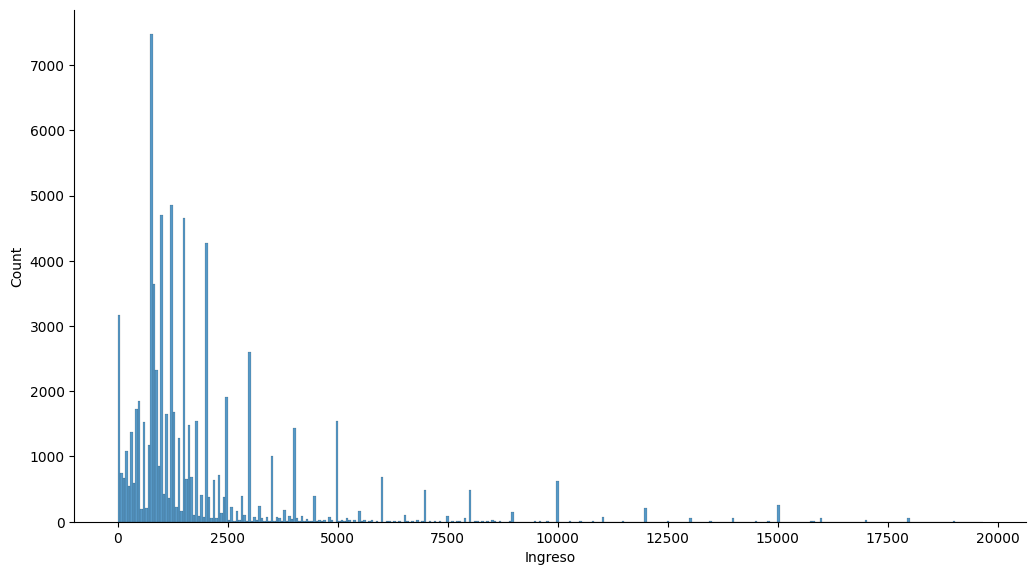

In [70]:
ax = sns.displot(datos.query("Ingreso < 20000").Ingreso)
ax.fig.set_size_inches(12, 6)
ax

In [71]:
moda = datos.Ingreso.mode()
moda

,Ingreso
0,788


In [72]:
mediana = datos.Ingreso.median()
mediana

1200.0

In [73]:
media = datos.Ingreso.mean()
media

np.float64(2000.3831988547631)

In [79]:
print(f"Moda < Mediana < Media: {moda.iloc[0] < mediana < media}")

Moda < Mediana < Media: True


***

### Evaluando la variable ALTURA

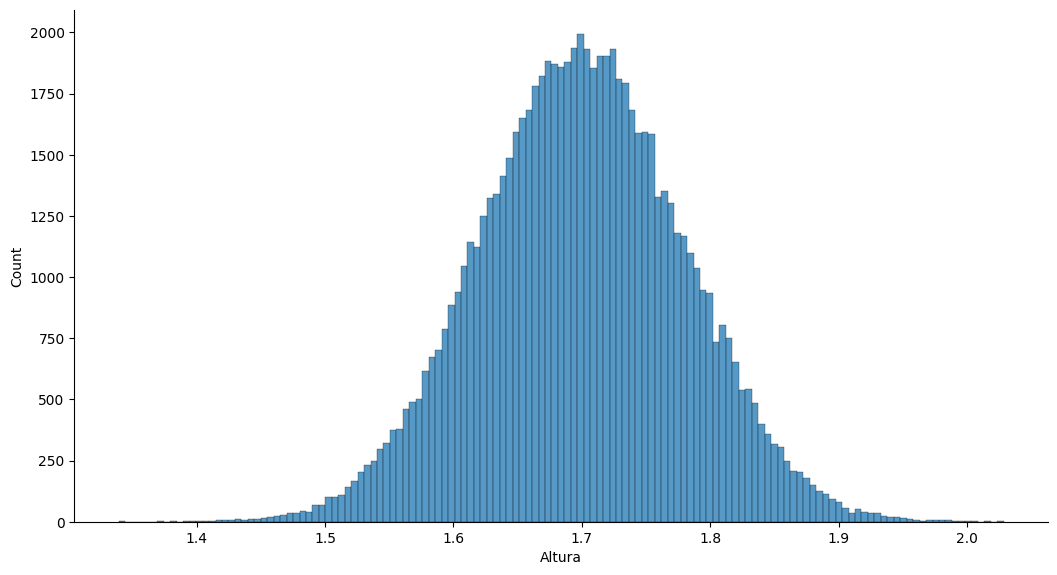

In [80]:
ax = sns.displot(datos.Altura)
ax.fig.set_size_inches(12, 6)
ax

In [81]:
moda = datos.Altura.mode()
moda

,Altura
0,1.568128
1,1.671225
2,1.681659
3,1.692977
4,1.708163
5,1.708370
6,1.753842
7,1.779073
8,1.796462


In [82]:
mediana = datos.Altura.median()
mediana

1.6993247325

In [83]:
media = datos.Altura.mean()
media

np.float64(1.6995124540575741)

***

### Evaluando la variable AÑOS DE ESTUDIO

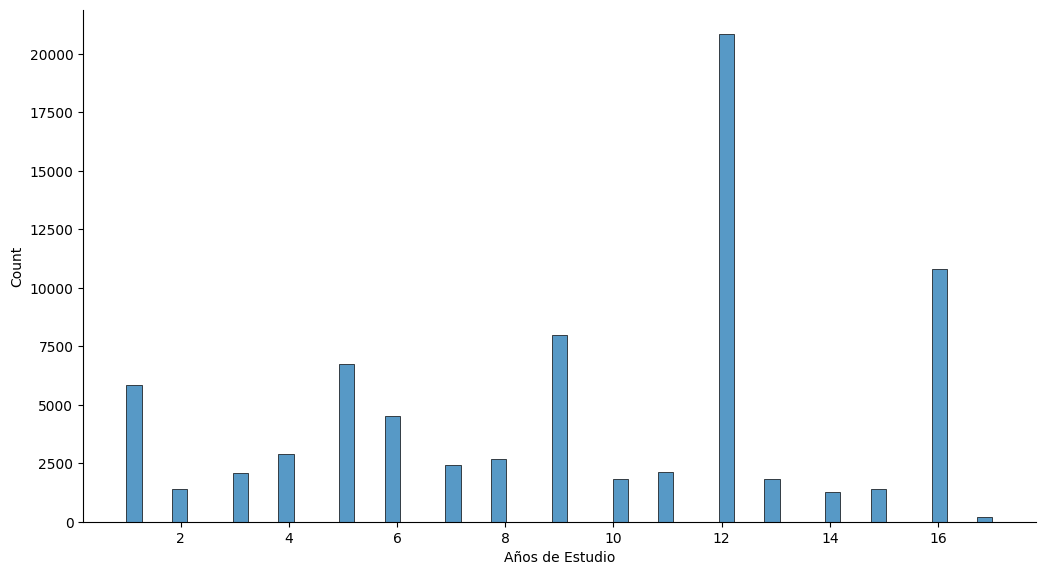

In [84]:
ax = sns.displot(datos['Años de Estudio'])
ax.fig.set_size_inches(12, 6)
ax

In [85]:
moda = datos['Años de Estudio'].mode()
moda

,Años de Estudio
0,12


In [86]:
mediana = datos['Años de Estudio'].median()
mediana

11.0

In [87]:
media = datos['Años de Estudio'].mean()
media

np.float64(9.469664237376367)

# <font color=#56B4E9>4 MEDIDAS DE LOCALIZACIÓN</font>
***

## <font color=#56B4E9>4.1 Cuartiles, deciles y percentiles</font>
***

Hay una serie de medidas de posición similares en su diseño a la mediana, aunque no son medidas de tendencia central. Como se sabe, la mediana divide la distribución en dos partes iguales en términos del número de elementos en cada parte. Los cuartiles, por otro lado, permiten que la distribución se divida en cuatro partes iguales en términos del número de elementos en cada uno; deciles en diez partes y centiles en cien partes iguales.

In [91]:
datos.Ingreso.quantile([0.25, 0.5, 0.75])

,Ingreso
0.25,788.0
0.50,1200.0
0.75,2000.0


In [93]:
[i/10 for i in range(1, 10)]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [95]:
datos.Ingreso.quantile([i/100 for i in range(1, 100)])

,Ingreso
0.01,0.0
0.02,0.0
0.03,0.0
0.04,50.0
0.05,100.0
...,...
0.95,6000.0
0.96,7000.0
0.97,8000.0
0.98,10000.0


/tmp/ipython-input-3648580624.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(datos.Edad,


<Axes: xlabel='Años', ylabel='Acumulado'>

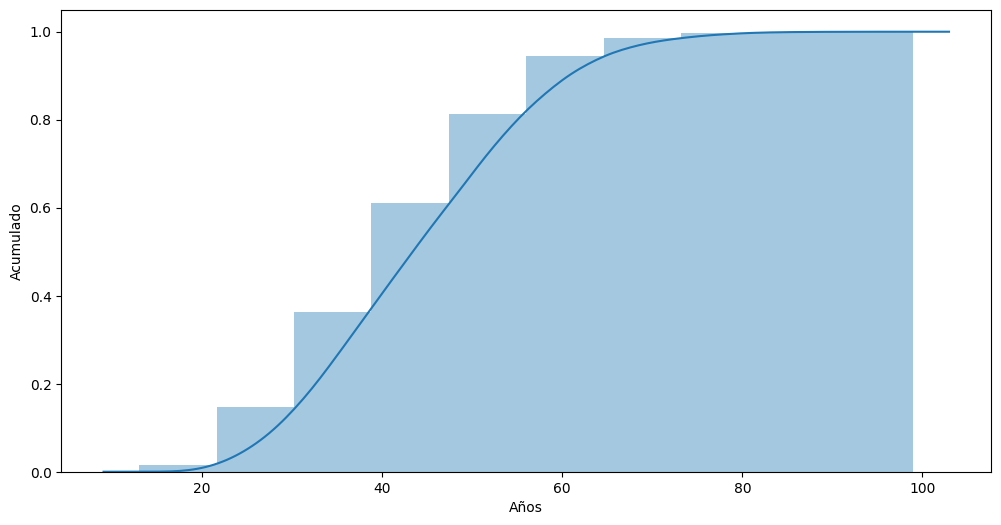

In [100]:
ax = sns.distplot(datos.Edad,
                 hist_kws = {'cumulative': True},
                 kde_kws = {'cumulative': True},
                 bins = 10)
ax.figure.set_size_inches(12, 6)
ax.set(xlabel = 'Años',
       ylabel = 'Acumulado')
ax

In [101]:
datos.Edad.quantile([i/10 for i in range(1, 10)])

,Edad
0.1,28.0
0.2,33.0
0.3,36.0
0.4,40.0
0.5,43.0
0.6,47.0
0.7,51.0
0.8,55.0
0.9,61.0


## <font color=#56B4E9>4.2 Box-plot</font>
***

El *box plot* da una idea de la posición, dispersión, asimetría, colas y valores extremos. La posición central está dada por la mediana y la dispersión por $IIQ$ (distancia inter cuartil). Las posiciones relativas de $Q1$, $Mediana$ y $Q3$ dan una idea de la simetría de la distribución. Las longitudes de las colas están dadas por las líneas que van desde el rectángulo a los valores remotos y por los valores extremos.

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img005.png' width='65%'>

/usr/local/lib/python3.11/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<Axes: xlabel='Altura'>

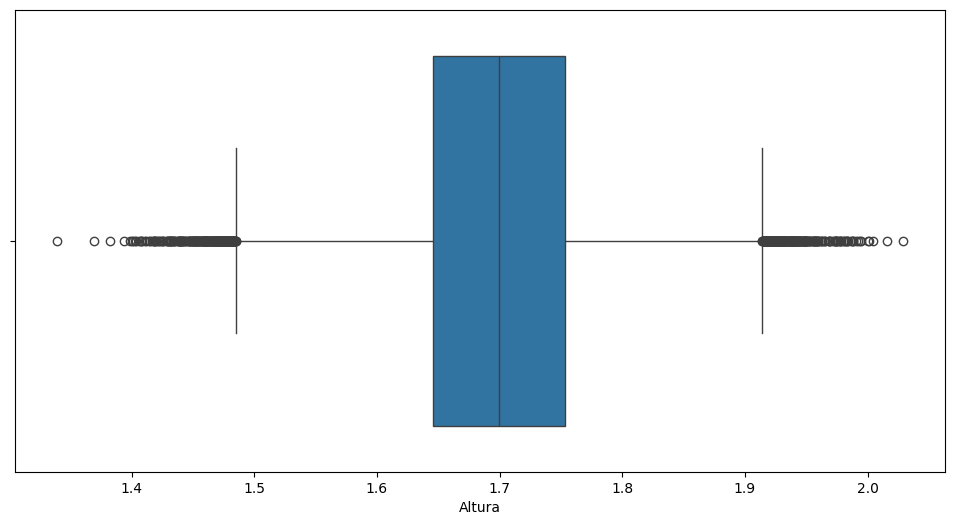

In [102]:
ax = sns.boxplot(x = 'Altura', data=datos, orient='v')
ax.figure.set_size_inches(12, 6)
ax

<Axes: xlabel='Altura', ylabel='Sexo'>

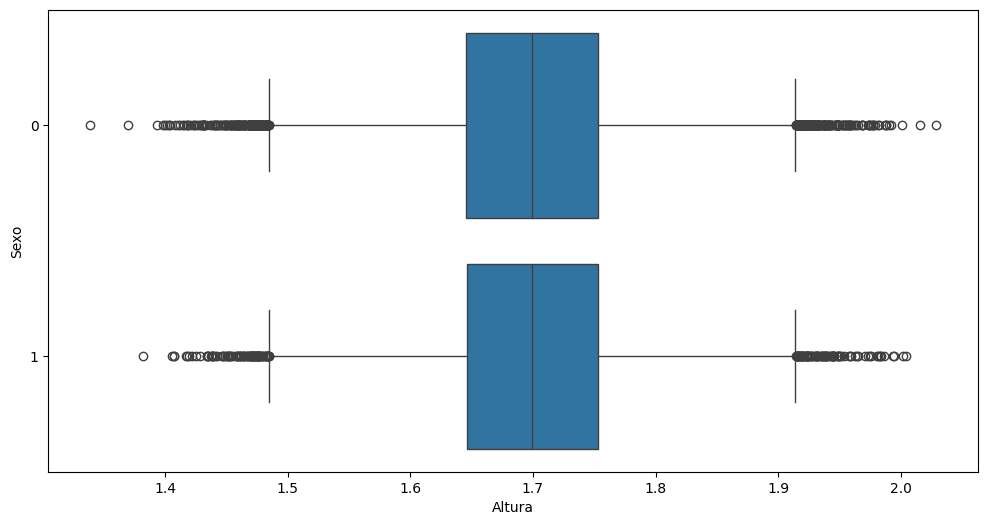

In [107]:
ax = sns.boxplot(x = 'Altura', y = 'Sexo', data=datos, orient='h')
ax.figure.set_size_inches(12, 6)
ax

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img006.png' width='80%'>

# <font color=#56B4E9>5 MEDIDAS DE DISPERSIÓN</font>
***

Aunque las medidas de tendencia central y de localización proporcionan un resumen muy importante de los datos, pueden no ser suficientes para caracterizar diferentes conjuntos, especialmente cuando las observaciones de una distribución dada presentan datos muy dispersos.

## <font color=#56B4E9>5.1 Desviación media absoluta</font>
***


# $$DM = \frac 1n\sum_{i=1}^{n}|X_i-\bar{X}|$$


## <font color=#56B4E9>5.2 Varianza</font>
***

### Varianza

La varianza se construye a partir de las diferencias entre cada observación y la media de los datos, es decir, la desviación alrededor de la media. Al calcular la varianza, las desviaciones alrededor de la media son elevadas al cuadrado.

### Varianza de la población

# $$\sigma^2 = \frac 1n\sum_{i=1}^{n}(X_i-\mu)^2$$

### Varianza de la muestra

# $$S^2 = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2$$

## <font color=#56B4E9>5.3 Desviación estándar</font>
***

Una de las restricciones de la varianza es el hecho de que proporciona medidas cuadráticas de las unidades originales; la varianza de las medidas de longitud, por ejemplo, está en unidades de área. Por lo tanto, el hecho de que las unidades sean diferentes dificulta la comparación de la dispersión con las variables que la definen. Una forma de eliminar esta dificultad es considerar su raíz cuadrada.

### Desviación estándar de la población

# $$\sigma = \sqrt{\frac 1n\sum_{i=1}^{n}(X_i-\mu)^2} \Longrightarrow \sigma = \sqrt{\sigma^2}$$


### Desviación estándar de la muestra

# $$S = \sqrt{\frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2} \Longrightarrow S = \sqrt{S^2}$$